# Chapter 02 데이터 다루기

## 02-1 훈련 세트와 테스트 세트

머신러닝 알고리즘은 **지도 학습**과 **비지도 학습**으로 나눌 수 있다.

지도 학습 알고리즘은 훈련하기 위한 **데이터**와 **정답**이 필요하다.

데이터와 정답은 **입력**과 **타깃**이라고 하고, 이 둘을 합쳐 **훈련 데이터**라고 한다.

입력에 사용된 길이와 무게는 **특성**이라고 한다.

### 훈련세트와 테스트 세트

**테스트 세트**(Test set) : 평가에 사용하는 데이터

**훈련 세트**(Train set) : 훈련에 사용되는 데이터

In [3]:
## 01-3과 같은 생선의 길이와 무게 리스트 생성

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 
               38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 
               11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 
               450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 
               700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 
               925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 
               9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [4]:
## 생선의 길이와 무게를 하나의 리스트로 담은 2차원 리스트 생성

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

**샘플**(sample) : 하나의 생선 데이터

따라서 도미와 빙어는 각각 35마리, 25마리가 있으므로 전체 데이터는 **49개의 샘플**이 있다.

사용하는 특성은 길이와 무게, 2개이다.

처음 **35개를 test set**으로, 나머지 **14개를 test set**으로 사용해보자.

In [5]:
## 사이킷런의 KNeighborsClassifier 클래스를 임포트하고 모델 객체 만들기

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

이제 전체 데이터에서 처음 35개를 선택해야한다.

리스트처럼 배열의 요소를 선택할 때는 배열의 위치, 즉 **인덱스**(index)를 지정한다.

In [8]:
## fish_data의 다섯 번째 샘플 출력

print(fish_data[4])
### 배열의 인덱스는 0부터 시작

[29.0, 430.0]


**슬라이싱**(Slicing) : 콜론(:)을 가운데 두고 인덱스의 번위를 지정하여 여러 개의 원소를 선택할 수 있다.

In [10]:
## 첫 번째부터 다섯 번째까지의 샘플을 선택해보자.

print(fish_data[0:5])
### 슬라이싱을 사용할 때는 마지막 인덱스의 원소는 포함되지 않는다.

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [11]:
## 처음에서 5개의 샘플 출력

print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [13]:
## 마지막에서 5개의 샘플 출력

print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [14]:
# 훈련 세트로 입력한 값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]

# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]

# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]

# 테스트 세트로 타깃값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

train set으로 fit() 메서드를 호출해 모델을 훈련하고, test set으로 score() 메서드를 호출해 평가해보자.

In [18]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

## 정확도가 0.0 -> 무엇이 문제일까? -> 샘플링 편향 때문이다.

0.0

### 샘플링 편향

마지막 14개를 test set로 만들면, 빙어 데이터만 들어가게 된다.

도미와 빙어를 확인하는 것이므로, train set와 test set에는 도미와 빙어 데이터가 골고루 섞여야 한다.

**샘플링 편향**(Sampling bias) : train set와 test set에 샘플이 골고루 섞여 있지 않으면 샘플링이 한쪽으로 치우쳤다는 의미이다.

### 넘파이

**넘파이**(Numpy) : 파이썬의 대표적인 배열 라이브러리

In [20]:
import numpy as np # 넘파이 임포트

In [21]:
## 파이썬 리스트를 넘파이 배열로 바꾸기

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [23]:
print(input_arr) # 49개의 행과 2개의 열

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [25]:
## shape : 배열의 크기를 알려준다.

print(input_arr.shape) # 이 명령를 사용하면 (샘플 수, 특성 수)를 출력한다.

(49, 2)


배열에서 랜덤하게 샘플을 선택해 train set과 test set으로 만들기 위해, 문작위로 샘플을 고르자.

**주의할 점** - input_arr와 taget_arr에서 같은 위치는 함께 선택되어야 함.

In [26]:
## 인덱스를 섞은 다음 input_arr와 target_arr에서 샘플을 선택
## arange() 함수 이용

np.random.seed(42) # 나의 출력 결과와 책의 결과가 같도록 조절
index = np.arange(49)
np.random.shuffle(index)

In [27]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


**배열 인덱싱**(array indexing) : 1개의 인덱스가 아닌 여러 개의 인덱스로 한 번에 여러 개의 원소를 선택할 수 있다.

In [28]:
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [30]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

만들어진 index의 첫 번째 값은 13이다.

따라서 train_input의 첫 번째 원소는 input_arr의 열 네 번째 원소가 들어 있을 것이다.

In [31]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [33]:
## 나머지 14개를 test set으로 만들어보자.

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

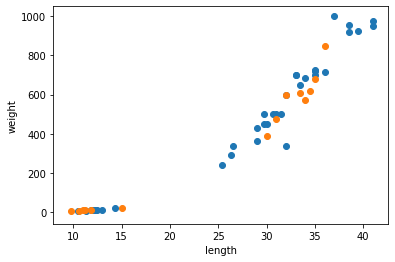

In [34]:
## 도미와 빙어가 잘 섞였는지 확인

import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 두 번째 머신러닝 프로그램

In [35]:
kn = kn.fit(train_input, train_target)

In [38]:
kn.score(test_input, test_target) # 1.0으로 정확도 100%

1.0

predict() 메서드로 test set의 예측 결과와 실제 타깃을 확인해보자.

In [39]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [40]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

### 훈련 모델 평가

(1) 모델을 훈련 할때, 사용한 데이터로 모델의 성능을 평가하면 안됨.

-> 따라서 train set과 test set으로 나눔.

-> train set으로 모델을 훈련하고, test set으로 모델을 평가함.

(2) 하지만 test set을 무작정 나누면 안됨.

-> 도미와 빙어를 분류하는 것이 목적이므로 train set나 test set에 어느 한 생선만 들어가 있다면 올바른 학습이 이루어지지 않음.

-> 따라서 골고루 섞기 위해 넘파이 사용함.

-> 넘파이의 shuffle() 함수를 사용해 배열의 인덱스를 섞음.

## 02-2 데이터 전처리

길이가 25cm, 무게가 250g이면 도미인데 위 모델은 빙어로 예측

-> 무슨 문제가 발생한 것일까?

### 넘파이로 데이터 준비하기

In [41]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 
               38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 
               11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 
               450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 
               700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 
               925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 
               9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [42]:
import numpy as np

**column_stack()** 함수 : 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결

In [44]:
np.column_stack(([1,2,3], [4,5,6])) # 3개의 행, 2개의 열

array([[1, 4],
       [2, 5],
       [3, 6]])

In [45]:
fish_data = np.column_stack((fish_length, fish_weight))

In [47]:
print(fish_data[:5]) # 2개의 열(생선의 길이와 무게)

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


동일한 방법으로 타깃 데이터도 만들어 보자.

이전 절에서는 원소가 하나인 리스트 [1], [0]을 여러 번 곱해서 만들었다.

이번에는 np.ones() 함수와 np.zeros() 함수를 이용해보자.

In [48]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


**np.concatenate()** 함수 : 첫 번째 차원에 따라 배열을 연결

In [49]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [51]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


데이터가 클 수록 파이썬 리스트는 비효율적이므로 넘파이 배열을 사용하는게 좋다.

### 사이킷런으로 훈련 세트와 테스트 세트 나누기

앞에서는 넘파이 배열의 인덱스를 직접 섞어서 train set와 test set로 나누었다.

이번에는 train_test_split() 함수를 이용해보자.

**train_test_split()** 함수 : 전달되는 리스트나 배열을 비율에 맞게 train set와 test set로 나누어 준다.

In [52]:
from sklearn.model_selection import train_test_split

In [56]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

# random_state 는 np.random.sed() 와 동일
# 아래 사진 참조.

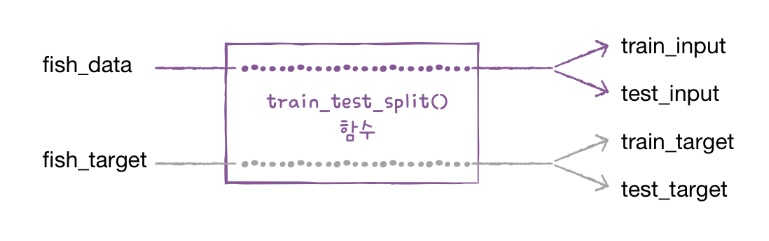

train_test_split() 함수는 기본적으로 25%를 test set로 떼어 낸다.

잘 나누어졌는지 넘파이 배열의 shape 속성으로 입력 데이터의 크기를 출력해 보자.

In [57]:
print(train_input.shape, test_input.shape) # 2개의 열이 있는 2차원 배열

(36, 2) (13, 2)


In [59]:
print(train_target.shape, test_target.shape) # 1차원 배열

(36,) (13,)


In [64]:
## 도미와 빙어가 잘 섞였는지 확인

print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


13개의 test set 중 10개가 도미(1)이고, 3개가 빙어(0)이다.

원래 도미와 빙어 비율 = 35 : 14 = 2.5 : 1

test set의 도미와 빙어 비율 = 3.3 : 1

**=> 샘플링 편향이 나타남**

stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눌 수 있음

=> train 데이터가 작거나, 특정 클래스의 샘플 개수가 적을 때 유용함

In [66]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [68]:
print(test_target) # 2.25:1

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


### 수상한 도미 한 마리

k-최근접 이웃을 훈련해보자. (k-최근접 이웃은 train 데이터를 저장하는 것이 훈련의 전부)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

25cm, 150g을 넣고 예측해보자. 당연히 도미(1)로 예측할 것이다.

**=> 그러나 빙어(0)으로 예측한다.**

In [70]:
print(kn.predict([[25, 150]]))

[0.]


정말 이렇게 큰 빙어가 있는 것인가?

이 샘플을 다른 데이터와 함께 산점도로 확인해보자.

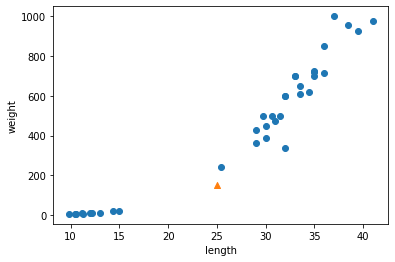

In [72]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^') # marker 매개변수는 모양을 지정합니다
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이 샘플은 분명히 도미 데이터에 더 가깝다. 그럼에도 왜 빙어라고 예측했는가?

k-최근접 이웃은 주변의 샘플 중에서 다수인 클래스를 예측으로 사용한다.

이 샘플의 주변 샘플을 알아보자. -> kneighbors() 메서드 이용

kneighbors() 메서드 : 주어진 샘플에서 가장 가까운 이웃을 찾아준다. 이웃까지의 거리와 이웃 샘플의 인덱스르 반환한다.

In [73]:
distance, indexes = kn.kneighbors([[25, 150]])

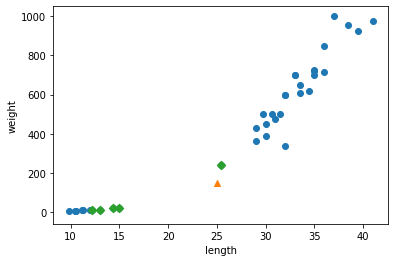

In [75]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker = 'D')
# marker = 'D'로 지정하면 산점도를 마름모로 그림
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

삼각형 샘플에 가장 가까운 5개의 샘플 중 도미는 하나밖에 포함되지 않았다.

나머지 4개의 샘플은 모두 빙어이다.

In [76]:
## 데이터를 직접 확인해보자.

print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [77]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


가장 가까운 이웃에는 빙어가 압도적으로 많으므로, 빙어로 예측하는 것은 무리가 아니다.

왜 가장 가까운 이웃을 빙어라고 생각할까?

In [79]:
print(distance)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


### 기준을 맞춰라

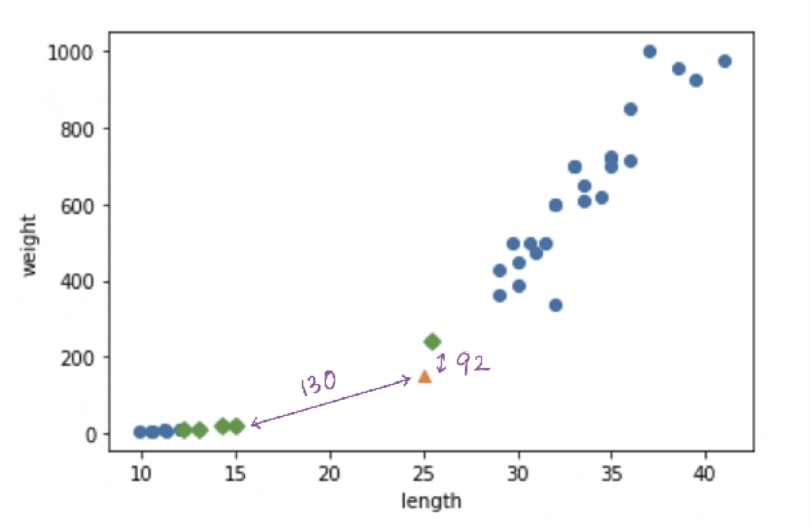

산점도를 다시 살펴보면, 삼각형 샘플에 가장 가까운 샘플까지의 거리는 92이이고, 그 외 가장 가까운 샘플들은 130, 138이다.

그런데, 거리가 92인 샘플의 몇배는 더 멀게 느껴짐에도 왜 거리가 130밖에 안될까?

=> x축은 범위가 좁고(10 ~ 40), y축은 범위가 넓다(0 ~ 1000).

=> 따라서 y축으로 조금만 멀어져도 거리가 아주 큰 값으로 계산된다.

**=> x축의 범위를 동일하게 0 ~ 1000으로 맞춰보자.**

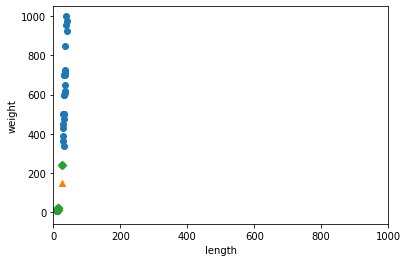

In [80]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000)) # x축 범위 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

x축과 y축의 범위를 동일하게 맞춘 것을 확인할 수 있다.

두 특성의 값이 놓인 범위가 매우 달랐다. 이를 두 특성의 **스케일**이 다르다고 말한다.

데이터를 표현하는 기준이 다르면 알고리즘을 올바르게 예측할 수 없다.

따라서 특성값을 일정한 기준으로 맞춰야 하고, 이런 작업을 **데이터 전처리**라고 한다.

가장 널리 사용하는 전처리 방법 중 하나는 **표준점수**이다.

표준점수(standard score) : 각 특성값이 0에서 표준편차의 몇 배만큼 떨어져 있는지를 나타낸다. 이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있다.

In [82]:
mean = np.mean(train_input, axis=0) # 평균 계산
std = np.std(train_input, axis=0) # 표준 편차 계산

In [84]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [86]:
train_scaled = (train_input - mean) / std # 브로드캐스팅

**브로드캐스팅**(broadcasting) : train_input의 모든 행에서 mean에 있는 두 평균 값을 뺀다. 그다음 std에 있는 두 표준편차를 다시 모든 행에 적용한다.

### 전처리 데이터로 모델 훈련하기

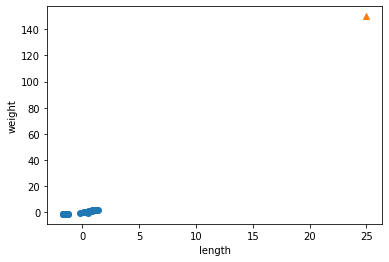

In [88]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

오른쪽 맨 꼭대기에 샘플 하나만 덩그러니 떨어져 있다.

-> train set를 mean으로 빼고 std로 나누어 주었기 때문에 값의 범위가 크게 달라졌기 때문이다.

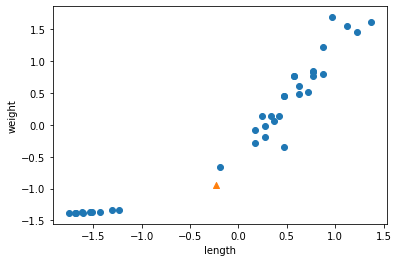

In [90]:
new = ([25, 150] - mean) / std 
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [91]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [92]:
test_scaled = (test_input - mean) / std

In [93]:
kn.score(test_scaled, test_target)

1.0

In [95]:
print(kn.predict([new])) ## 도미로 예측함

[1.]


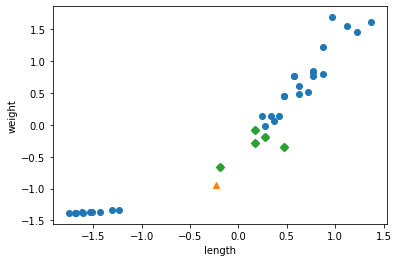

In [96]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

삼각형 샘플의 가장 가까운 데이터는 모두 도미인 것을 확인할 수 있다.

### 스케일이 다른 특성 처리

25cm, 150g을 처음에능 엉뚱하게 빙어로 예측했다. 그러나 그래프로 보면 도미에 가까웠다.

=> 샘플의 두 특성인 길이와 무게의 스케일이 다르기 때문이다.

=> 길이보다 무게의 크기에 따라 예측값이 좌지우지 된다.

따라서, 특성을 표준점수로 변환했다.